<a href="https://colab.research.google.com/github/ADMEricOliveiraDSA/analises/blob/master/despesas_da_camara_municipal_FSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LINK DOS DADOS ENCONTRA-SE ABAIXO
https://www.kaggle.com/anapaulagomes/despesas-da-cmara-municipal

In [0]:
# IMPORTANDO BIBLIOTECAS 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
# LENDO O ARQUIVO CSV DESPESAS FSA
df = pd.read_csv ('/content/drive/My Drive/expenses-11.04.2020.csv')

In [0]:
# VENDO ÚLTIMAS 5 LINHAS 
df.tail()

,company_or_person,crawled_at,crawled_from,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
35530,VALE TRANSPORTES,2020-04-11 10:15:10.732686,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,NaN,NaN,NaN,00271-20,pagamento,NaN,2020-03-20,NaN,NaN,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000058,NaN,214.87
35531,VEREADORES,2020-04-11 10:15:10.736784,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00261-20,pagamento,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF A SUBSÍDIOS DOS VEREADORES, MÊS DE MARÇO/2...",ISENTO,8318.32
35532,VEREADORES,2020-04-11 10:15:10.739669,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00262-20,pagamento,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF A SUBSÍDIOS DOS VEREADORES, MÊS DE MARÇO/2...",ISENTO,9362.51
35533,IPFS - INST. DE PREV. DOS SERV,2020-04-11 10:15:10.744187,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,42.743.658/0001-33,01 - LEGISLATIVA,Administracao da acao legislativa,319113020000 - Cont.p/Reg.Proprio Prev.ser.RPP...,20000012/0006,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,Cont.p/Reg.Proprio Prev.ser.RPPS,REF. OBRIGAÇÕES PATRONAIS SOBRE FOLHA DE VEREA...,ISENTO,605.10
35534,FUNCIONARIOS CARGOS EM COMISSA,2020-04-11 10:15:10.747130,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339049000000 - Auxilio - Transporte ...,00266-20,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,Auxilio - Transporte,REF. A AUXÍLIO TRANSPORTE PARA OS SERVIDORES C...,ISENTO,14545.80


In [0]:
# TAMANHO DO DATASET 
df.shape

(35535, 18)

In [0]:
# COLUNAS DO DATASET 
df.columns

Index(['company_or_person', 'crawled_at', 'crawled_from', 'date', 'document',
       'function', 'group', 'legal_status', 'number', 'phase',
       'process_number', 'published_at', 'resource', 'subfunction', 'subgroup',
       'summary', 'type_of_process', 'value'],
      dtype='object')

In [0]:
# INFORMAÇÃO DE TIPOS  (TYPES)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35535 entries, 0 to 35534
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_or_person  35432 non-null  object 
 1   crawled_at         35535 non-null  object 
 2   crawled_from       35535 non-null  object 
 3   date               35535 non-null  object 
 4   document           35432 non-null  object 
 5   function           33293 non-null  object 
 6   group              33235 non-null  object 
 7   legal_status       33283 non-null  object 
 8   number             35535 non-null  object 
 9   phase              35535 non-null  object 
 10  process_number     18128 non-null  object 
 11  published_at       35535 non-null  object 
 12  resource           33293 non-null  object 
 13  subfunction        33293 non-null  object 
 14  subgroup           33235 non-null  object 
 15  summary            35481 non-null  object 
 16  type_of_process    332

In [0]:
# VALORES ESTATÍSTICOS AO TODO 
df.describe(include='all')

,company_or_person,crawled_at,crawled_from,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
count,35432,35535,35535,35535,35432,33293,33235,33283,35535,35535,18128,35535,33293,33293,33235,35481,33293,3.553500e+04
unique,711,35535,1,2306,740,1,3,250,16468,3,2951,2306,1,1,157,16160,8,NaN
top,CAIXA ECONOMICA FEDERAL,2020-04-11 10:13:12.496697,https://www.transparencia.feiradesantana.ba.le...,2017-12-20,14.488.415/0001-60,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039990000 - Outros Serv.Terceiros - P. Juri...,855/2015,pagamento,001/2014,2017-12-20,0000 - TESOURO,031 - ACAO,Outros Serv.Terceiros - P. Juridica,"REF. A TARIFA BANCARIA SOBRE CONTA DESTA CASA,...",ISENTO,NaN
freq,2304,1,35535,140,3846,33293,23495,5483,22,15721,424,140,33293,33293,7040,785,15199,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.729275e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.726297e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+06
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.465100e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+03


#### INICIANDO ANÁLISE  BASEADA NO VALOR GASTO POR SUBGRUPOS 

In [0]:
# ATRIBUINDO VARIÁVEL SUBGROUP A TABELA 
# DATAFRAME APENAS COM SUBGROUP E VALUE
subgroup_valor = df[['subgroup','value']]

In [0]:
# ATRIBUINDO VARIÁVEL X AOS VALORES DOS SUBGRUPOS DO MENOR AO MAIOR 
x = subgroup_valor.sort_values (by='value')

In [0]:
# CONTANDO VALORES POR LINHAS DO DATASET 
x.count()

subgroup    33235
value       35535
dtype: int64

In [0]:
# VALORES EM ESPÉCIE POR SUBGRUPOS 
# DOS MENORES AOS MAIORES
# PRIMEIRAS 5 LINHAS 
x.head ()

,subgroup,value
19533,V.Vant.Fixas P.Civil(Ve.Base Folha),-1000000.00
13735,Outros Serv.Terceiros - P. Juridica,-625337.72
15791,V.Vant.Fixas P.Civil(Ve.Base Folha),-450000.00
27072,V.Vant.Fixas P.Civil(Ve.Base Folha),-400000.00
30978,Outros Serv.Terceiros - P. Juridica,-300000.00


In [0]:
# TOP 10 VALORES EM ESPÉCIE POR SUBGRUPOS 
x1= x[['subgroup','value']].nlargest(10,'value')

In [0]:
# TRANSFORMAND X1 EM DATAFRAME 
x1= pd.DataFrame(x1)

In [0]:
# OS TOP 10 VALORES PERTENCEM AO SUBGRUPO :
# V.Vant.Fixas P.Civil(Ve.Base Folha)
 
x1

,subgroup,value
34962,V.Vant.Fixas P.Civil(Ve.Base Folha),12400000.0
31339,V.Vant.Fixas P.Civil(Ve.Base Folha),11300000.0
24469,V.Vant.Fixas P.Civil(Ve.Base Folha),10200000.0
27934,V.Vant.Fixas P.Civil(Ve.Base Folha),10000000.0
21353,V.Vant.Fixas P.Civil(Ve.Base Folha),8000000.0
16929,V.Vant.Fixas P.Civil(Ve.Base Folha),7000000.0
13185,V.Vant.Fixas P.Civil(Ve.Base Folha),4900000.0
24471,V.Vant.Fixas P.Civil(Ve.Base Folha),4200000.0
34973,V.Vant.Fixas P.Civil(Ve.Base Folha),4110000.0
31358,V.Vant.Fixas P.Civil(Ve.Base Folha),4110000.0


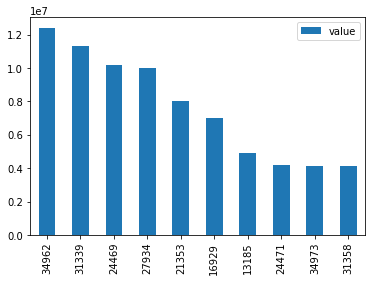

In [0]:
x1.plot (kind='bar');

In [0]:
# ATRIBUINDO VARIÁVEL SUBGRUPO_VAL AO RESULTADO 
# DOS SUBGRUPOS MAIS ACIONADOS PELA PREFEITURA 
# NO TOPO DO OUTPUT MOSTRA OS MAIORES 
# CRIEI O DATAFRAME PARA O OUTPUT 
subgrupo_val = df['subgroup'].value_counts().to_frame ()

In [0]:
# EXIBINDO OS TOP 13 SUBGRUPOS MAIS ACIONADOS PELA PREFEITURA 
subgrupo_val.nlargest(13,'subgroup')

,subgroup
Outros Serv.Terceiros - P. Juridica,7040
Diarias-Civil,5441
OUTROS SERVICOS TERC. P.JURIDICA,2124
V.Vant.Fixas P.Civil(Ve.Base Folha),1470
Materiais de Consumo - Outros,1266
Publicidades e Propaganda,1195
DIARIAS - CIVIL,1023
Serviços de Telefonia,796
Auxilio - Transporte,655
Cont.p/Reg.Geral Prev.INSS,645


In [0]:
# ATRIBUINDO VARIÁVEL top10_subgrupo AO RESULTADO DA OPERAÇÃO DE SELECIONAR TOP 13 SUBGRUPOS 
top10_subgrupo = subgrupo_val.nlargest(13,'subgroup')

In [0]:
# COLOCANDO ÍNDICE NAS LINHAS DO DATASET SEGUINTE
top10_subgrupo.reset_index(inplace =True )

In [0]:
# LINHAS 2 , 6 E 10 ELIMINADAS POR QUESTÃO DE VALORES REPETIDOS 
top10_subgrupo

,index,subgroup
0,Outros Serv.Terceiros - P. Juridica,7040
1,Diarias-Civil,5441
2,OUTROS SERVICOS TERC. P.JURIDICA,2124
3,V.Vant.Fixas P.Civil(Ve.Base Folha),1470
4,Materiais de Consumo - Outros,1266
5,Publicidades e Propaganda,1195
6,DIARIAS - CIVIL,1023
7,Serviços de Telefonia,796
8,Auxilio - Transporte,655
9,Cont.p/Reg.Geral Prev.INSS,645


In [0]:
# ELIMINANDO LINHA 2 
top10_subgrupo.drop(2,inplace=True)

In [0]:
# ELIMINANDO LINHA 6
top10_subgrupo.drop(6,inplace=True)

In [0]:
# ELIMINANDO LINHA 10 
top10_subgrupo.drop (10,inplace=True)

#### PLOTANDO GRAFICOS TOP 10 SUBGRUPOS MAIS ACIONADOS PELA PREFEITURA DE FEIRA DE SANTANA  

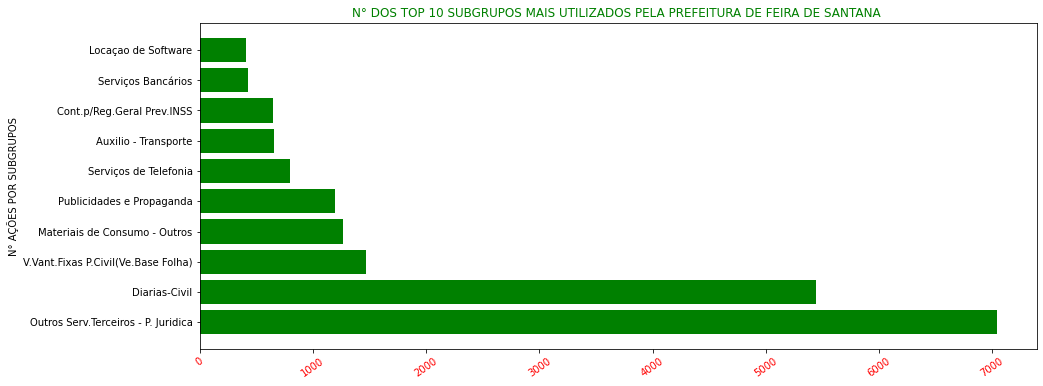

In [0]:
plt.figure(figsize=(15,6))
plt.barh(top10_subgrupo['index'],top10_subgrupo.subgroup,color='g')
plt.ylabel('N° AÇÕES POR SUBGRUPOS',color='k')
plt.xticks(rotation=35,color='r')
plt.title('N° DOS TOP 10 SUBGRUPOS MAIS UTILIZADOS PELA PREFEITURA DE FEIRA DE SANTANA ',color='g')
plt.savefig('top10subg.png', dpi=250, facecolor='w', edgecolor='w',
            orientation='portrait', format='png',
            transparent=True,bbox_inches='tight')
 
plt.show();

In [0]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [0]:
 
# Definindo o renderizador:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [0]:
trace = go.Bar(x = top10_subgrupo['index'],
               y = top10_subgrupo['subgroup'],
               text=top10_subgrupo['subgroup'],
               textposition='auto')
data = [trace]
layout = dict(title='TOP 10 SUBGRUPOS MAIS USADOS PREFEITURA DE FEIRA DE SANTANA')
fig = dict(data=data, layout=layout)
 
py.iplot(fig)

### ANÁLISE POR PARTES REFERENTES A CADA COLUNA 

In [0]:
df.head()

,company_or_person,crawled_at,crawled_from,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
0,EDITORA PRINCESA LTDA,2020-04-11 10:12:39.549868,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,00.725.755/0001-62,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039680000 - Serv.de Publicidade e propagand...,062/2010,empenho,029/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Serv.de Publicidade e propaganda,IMPORTE DESTINADO PUBLICACAO DE ATOS OFICIAIS ...,DISPENSA,130.00
1,CEDRO EDITORA GRAFICA LTDA,2020-04-11 10:12:39.553791,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,00.597.920/0001-30,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039680000 - Serv.de Publicidade e propagand...,063/2010,empenho,030/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Serv.de Publicidade e propaganda,IMPORTE DESTINADO A PUBLICACAO DE ATOS OFICIAI...,DISPENSA,360.00
2,ELEVADORES OTIS LTDA,2020-04-11 10:12:39.561768,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,02.973.973/0010-01,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039150000 - Manut.e Conserv.de Maq.e Equipa...,041/2010,empenho,019/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Manut.e Conserv.de Maq.e Equipament,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE MA...,DISPENSA,5166.72
3,EMPR. BRAS. DE CORREIOS E TELE,2020-04-11 10:12:39.564685,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,03.402.831/3861-17,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039740000 - Outros Serv. de Terc.-P. Juridi...,042/2010,empenho,020/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Outros Serv. de Terc.-P. Juridica,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE CO...,DISPENSA,35000.00
4,COMANDOS TERC. E SEG. ELETR. L,2020-04-11 10:12:39.572683,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,00.046.493/0001-07,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039600000 - Vigilancia Ostensiva ...,021/2010,empenho,013/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Vigilancia Ostensiva,IMPORTE DESTINADO A PAGAMENTO ...,DISPENSA,2260.00


In [0]:
# FATIANDO DATASET POR COMPANHIA OU PESSOAS POR TIPO DE PROCESSO COM OS 20 MAIORES VALORES 
df[['company_or_person','type_of_process','value']].nlargest(20,'value')


,company_or_person,type_of_process,value
34962,FUNCIONARIOS CARGOS EM COMISSA,ISENTO,12400000.00
31339,FUNCIONARIOS CARGOS EM COMISSA,ISENTO,11300000.00
24469,FUNCIONARIOS CARGOS EM COMISSA,ISENTO,10200000.00
27934,FUNCIONARIOS CARGOS EM COMISSA,ISENTO,10000000.00
21353,FUNCIONARIOS CARGOS EM COMISSA,ISENTO,8000000.00
16929,FUNCIONARIOS CARGOS EM COMISSA,ISENTO,7000000.00
13185,FUNCIONARIOS CARGOS EM COMISSA,ISENTO,4900000.00
24471,VEREADORES,ISENTO,4200000.00
31358,VEREADORES,ISENTO,4110000.00
34973,VEREADORES,ISENTO,4110000.00


In [0]:
# ATRIBUINDO VARIÁVEL A  VEZES ONDE MAIS FORAM ACIONADAS COMPANHIAS OU PESSOAS 
# CRIANDO DATAFRAME COM O RESULTADO E COLOCANDO O ÍNDICE NO LADO ESQUERDO 
companhia_ou_pessoa = df.company_or_person.value_counts ().to_frame ().reset_index ()

In [0]:
# ATRIBUINDO VARIÁVEL AO RESULTADO DAS TOP 10 PESSOAS FÍSICAS E JURÍDICAS MAIS ACIONADOS 
c_p_10 = companhia_ou_pessoa.head (10)

PLOT GRÁFICO DOS RESULTADOS ABAIXO

<Figure size 1080x432 with 0 Axes>

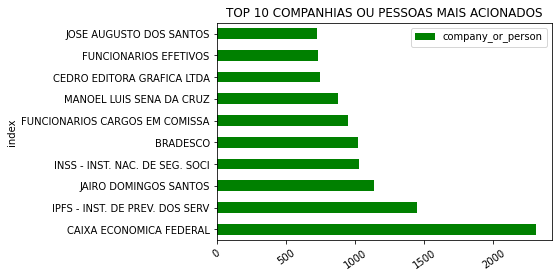

In [0]:
plt.figure(figsize=(15,6))
c_p_10.plot(x='index',
            y='company_or_person',
            kind='barh',color='g'
            )
plt.xticks(rotation=35)
plt.title('TOP 10 COMPANHIAS OU PESSOAS MAIS ACIONADOS')
plt.show();

In [0]:
# ATRIBUINDO VARIÁVEL c_p_10valor AO RESULTADO DA OPERAÇÃO ABAIXO SOBRE 10 MAIORES VALORES EM DINHEIRO POR COMPANHIAS OU PESSOAS PARA PREF. FSA 
c_p_10valor = df[['company_or_person','value']].nlargest(10,'value')

In [0]:
# SETANDO ÍNDICE PARA FACILITAR MANIPULAÇÃO PARA FAZER O GRÁFICO APARECER OS VALORES NOMINAIS NO EIXO X , E IMPLICANDO PARA FICAR SALVO EM MEMÓRIA 
c_p_10valor.reset_index(inplace=True)

PLOTES DOS GRÁFICOS COM RESULTADOS ABAIXO 

<Figure size 1080x432 with 0 Axes>

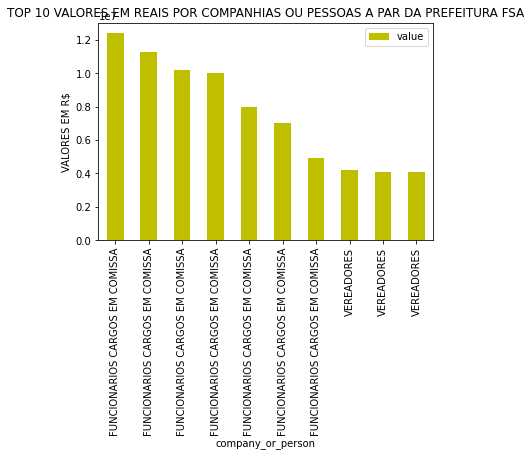

In [0]:
plt.figure(figsize=(15,6))
c_p_10valor.plot(x='company_or_person',
                 y='value',color='y',
                 kind='bar'
                )
plt.title('TOP 10 VALORES EM REAIS POR COMPANHIAS OU PESSOAS A PAR DA PREFEITURA FSA')
plt.ylabel('VALORES EM R$')
plt.show ();           

In [0]:
c_p_10valor = go.Bar(x = c_p_10valor['company_or_person'],
                     y = c_p_10valor['value'],
                     text=c_p_10valor['value'],
                     textposition='auto')
data = [c_p_10valor]
layout = dict(title='TOP 10 VALORES R$ POR COMPANHIAS OU PESSOAS  PREFEITURA DE FEIRA DE SANTANA')
fig = dict(data=data, layout=layout)

py.iplot(fig)

### ANÁLISE PARA GRUPO EM AÇÕES LEGISLATIVAS 

In [0]:
# NÚMEROS DE AÇÕES POR GRUPOS EM ATIVIDADE LEGISLATIVA 
df.group.value_counts()

Manutencao dos servicos tecnico administrativos    23495
Administracao de pessoal e encargos                 8869
Administracao da acao legislativa                    871
Name: group, dtype: int64

### GRÁFICOS COM OS RESULTADOS ABAIXO 

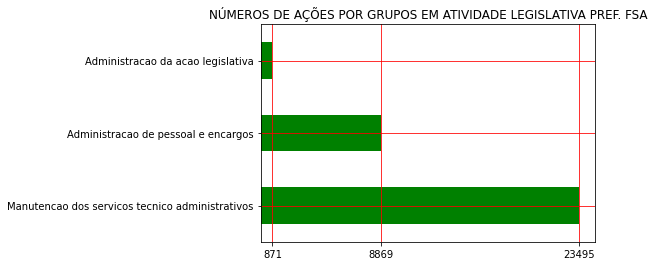

In [0]:
# GRÁFICO ELEGENDO OS NÚMEROS DE AÇÕES POR GRUPOS EM ATIVIDADE LEGISLATIVA 
df.group.value_counts().plot(kind='barh',color='g')
plt.xticks([871,8869,23495])
plt.grid (color='r')
plt.title('NÚMEROS DE AÇÕES POR GRUPOS EM ATIVIDADE LEGISLATIVA PREF. FSA')
plt.show();

In [0]:
# VENDO VALORES TOTAIS EM DINHEIRO POR GRUPOS LEGISLATIVOS 
# QUE NO CASO SÃO 3 ,COMO NO OUTPUT ABAIXO 
# ATRIBUINDO VARIÁVEL grupo_valor  
grupo_valor = df.groupby(by='group')['value'].sum ()

In [0]:
# ATRIBUINDO VARIÁVEL grupo_valor AO DATAFRAME COM ÍNDICE SETADO A ESQUERDA 
# FACILITA A LÓGICA DO PLOTLY 
grupo_valor=grupo_valor.to_frame ().reset_index ()


In [0]:
grupo_valor = go.Bar(x = grupo_valor['group'],
                     y = grupo_valor['value'],
                     text = grupo_valor['value'],
                     textposition = 'auto'
                    )
data = [grupo_valor]
layout = dict(title='VALORES MÁXIMOS EM ESPÉCIE POR GRUPOS EM ATIVIDADE LEGISLATIVA')
fig = dict(data=data, layout=layout)

py.iplot(fig)

In [0]:
df.tail ()

,company_or_person,crawled_at,crawled_from,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
35530,VALE TRANSPORTES,2020-04-11 10:15:10.732686,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,NaN,NaN,NaN,00271-20,pagamento,NaN,2020-03-20,NaN,NaN,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000058,NaN,214.87
35531,VEREADORES,2020-04-11 10:15:10.736784,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00261-20,pagamento,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF A SUBSÍDIOS DOS VEREADORES, MÊS DE MARÇO/2...",ISENTO,8318.32
35532,VEREADORES,2020-04-11 10:15:10.739669,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00262-20,pagamento,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF A SUBSÍDIOS DOS VEREADORES, MÊS DE MARÇO/2...",ISENTO,9362.51
35533,IPFS - INST. DE PREV. DOS SERV,2020-04-11 10:15:10.744187,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,42.743.658/0001-33,01 - LEGISLATIVA,Administracao da acao legislativa,319113020000 - Cont.p/Reg.Proprio Prev.ser.RPP...,20000012/0006,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,Cont.p/Reg.Proprio Prev.ser.RPPS,REF. OBRIGAÇÕES PATRONAIS SOBRE FOLHA DE VEREA...,ISENTO,605.10
35534,FUNCIONARIOS CARGOS EM COMISSA,2020-04-11 10:15:10.747130,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339049000000 - Auxilio - Transporte ...,00266-20,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,Auxilio - Transporte,REF. A AUXÍLIO TRANSPORTE PARA OS SERVIDORES C...,ISENTO,14545.80


### VISUALIZAÇÃO FASES POR CATEGORIAS 

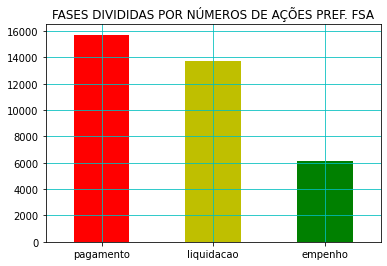

In [0]:
# GRÁFICO ELEGENDO FASES POR CATEGORIAS 
df.phase.value_counts ().plot(kind='bar',color=['r','y','g'])
plt.xticks(rotation=360)
plt.title('FASES DIVIDIDAS POR NÚMEROS DE AÇÕES PREF. FSA')
plt.grid(color='c');

In [0]:
# ATRIBUINDO VARIÁVEL fase_valor AO AGRUPAMENTO POR FASE COM VALORES SOMADOS 
fase_valor = df.groupby(by='phase')['value'].sum ()

In [0]:
# CRIANDO DATAFRAME COM O RESULTADO DE fase_valor E ADICIONANDO ÍNDICE
fase_valor = fase_valor.to_frame ().reset_index ()

In [0]:
fase_valor

,phase,value
0,empenho,2.294989e+08
1,liquidacao,1.971263e+08
2,pagamento,1.878728e+08


In [0]:
fase_valor = go.Bar(x = fase_valor['phase'],
                     y = fase_valor['value'],
                     text = fase_valor['value'],
                     textposition = 'auto')
data = [fase_valor]
layout = dict(title='VALORES MÁXIMOS EM ESPÉCIE POR FASES ADMINISTRATIVAS PREF. FSA')
fig = dict(data=data, layout=layout)
 
py.iplot(fig)

### ANÁLISE DOS STATUS LEGAIS NOS 10 MAIORES VALORES EM ESPÉCIE ABAIXO 

In [0]:
# ATRIBUINDO VARIÁVEL status_legal_v AO AGRUPAMENTO DA COLUNA legal_status POR VALORES SOMADOS 
status_legal_v = df.groupby(by='legal_status')['value'].sum ()

In [0]:
# CRIANDO DATAFRAME COM O RESULTADO E COLOCANDO O ÍNDICE 
status_legal_v= pd.DataFrame(status_legal_v).reset_index()                                                          

In [0]:
# PEGANDO TOP 10 VALORES EM ESPÉCIE POR STATUS LEGAIS 
legal_status = status_legal_v[['legal_status','value']].nlargest(10,'value')

In [0]:
legal_status

,legal_status,value
2,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,1.457834e+08
6,319011010000000000 - V.Vant.Fixas P.Civil(Ve.B...,9.740740e+07
3,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,4.393818e+07
7,319011010000000000 - V.Vant.Fixas P.Civil(Ve.B...,3.123407e+07
4,319011010000 - VENC E VANT FIXAS P.C.( BASE-FO...,2.877766e+07
13,319013010000 - Cont.p/Reg.Geral Prev.INSS ...,2.510873e+07
189,339039990000 - Outros Serv.Terceiros - P. Juri...,2.457158e+07
15,319013010000000000 - Cont.p/Reg.Geral Prev.INS...,1.507988e+07
190,339039990000000000 - Outros Serv.Terceiros - P...,1.256308e+07
5,319011010000 - VENC E VANT FIXAS P.C.( BASE-FO...,1.210831e+07


In [0]:
legal_status = go.Bar(x = legal_status['legal_status'],
                      y = legal_status['value'],
                      text = legal_status['value'],
                      textposition = 'auto')
data = [legal_status]
layout = dict(title='VALORES MÁXIMOS EM ESPÉCIE POR STATUS LEGAIS PREF. FSA')
fig = dict(data=data, layout=layout)

py.iplot(fig)

In [0]:
df.tail ()

,company_or_person,crawled_at,crawled_from,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
35530,VALE TRANSPORTES,2020-04-11 10:15:10.732686,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,NaN,NaN,NaN,00271-20,pagamento,NaN,2020-03-20,NaN,NaN,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000058,NaN,214.87
35531,VEREADORES,2020-04-11 10:15:10.736784,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00261-20,pagamento,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF A SUBSÍDIOS DOS VEREADORES, MÊS DE MARÇO/2...",ISENTO,8318.32
35532,VEREADORES,2020-04-11 10:15:10.739669,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Administracao da acao legislativa,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,00262-20,pagamento,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF A SUBSÍDIOS DOS VEREADORES, MÊS DE MARÇO/2...",ISENTO,9362.51
35533,IPFS - INST. DE PREV. DOS SERV,2020-04-11 10:15:10.744187,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,42.743.658/0001-33,01 - LEGISLATIVA,Administracao da acao legislativa,319113020000 - Cont.p/Reg.Proprio Prev.ser.RPP...,20000012/0006,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,Cont.p/Reg.Proprio Prev.ser.RPPS,REF. OBRIGAÇÕES PATRONAIS SOBRE FOLHA DE VEREA...,ISENTO,605.10
35534,FUNCIONARIOS CARGOS EM COMISSA,2020-04-11 10:15:10.747130,https://www.transparencia.feiradesantana.ba.le...,2020-03-20,14.488.415/0001-60,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339049000000 - Auxilio - Transporte ...,00266-20,liquidacao,NaN,2020-03-20,0000 - TESOURO,031 - ACAO,Auxilio - Transporte,REF. A AUXÍLIO TRANSPORTE PARA OS SERVIDORES C...,ISENTO,14545.80


### ANÁLISE DOS SUMÁRIOS  
### GRÁFICOS DOS RESULTADOS 

In [0]:
#ATRIBUINDO VARIÁVEL sumario AO DATAFRAME CONTADO POR CATEGORIAS E ÍNDICE RESETADO 
sumario = df.summary.value_counts ().to_frame ().reset_index()

In [0]:
# ATRIBUINDO VARIÁVEL dados_sumario AO DATAFRAME COM 0S 10 VALORES MAIS CONTABILIZADOS NA COLUNA summary 
dados_sumario = sumario.head(10)

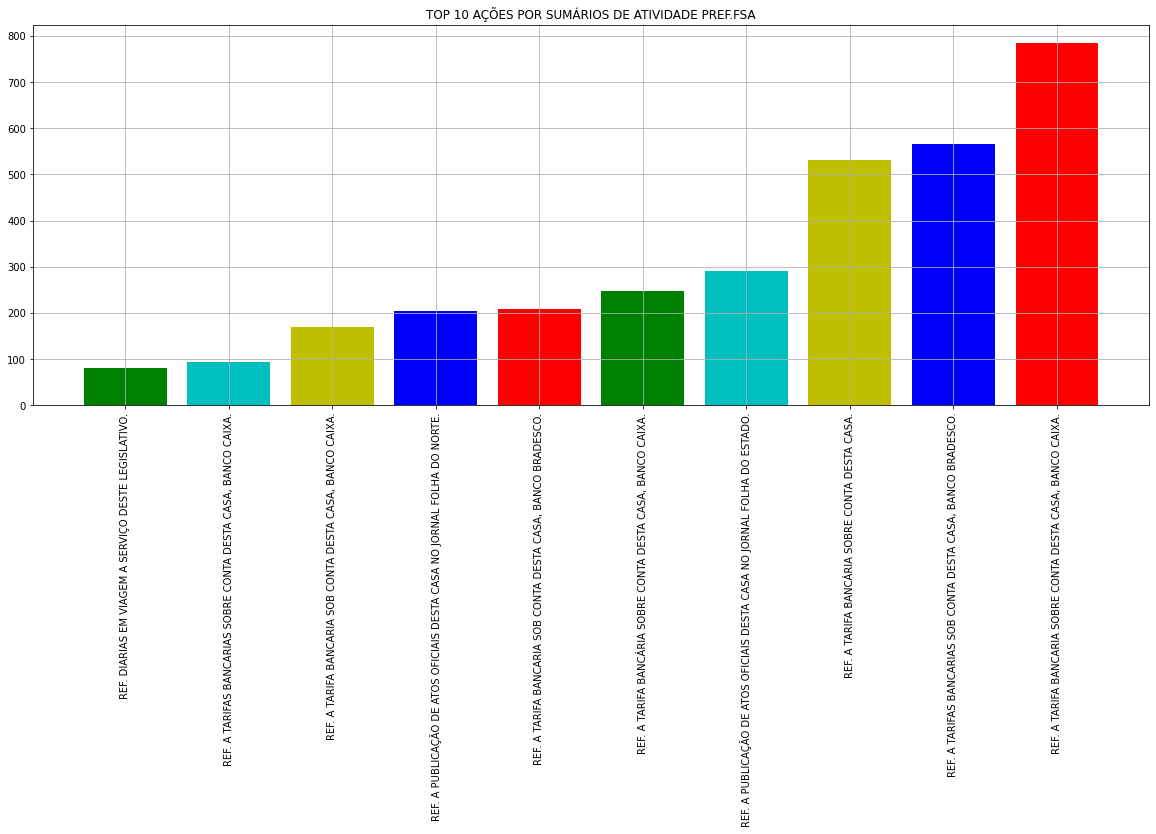

In [0]:
plt.figure(figsize=(20,7))
plt.bar(dados_sumario['index'],
         dados_sumario.summary,
        color=['r','b','y','c','g'])
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.grid()
plt.title('TOP 10 AÇÕES POR SUMÁRIOS DE ATIVIDADE PREF.FSA')
plt.show ();

In [0]:
# AGRUPAMENTO POR VALORES EM SUMÁRIOS RELAÇÃO DE OBJETIVOS, ARTIFÍCIOS, NO GERAL ADQUIRIDOS
df.groupby(by='summary')['value'].size ()

summary
01 CILINDRO COM CARTUCHO DE TONER PARA IMPRESSORA BROTHER 8085 DA GERÊNCIA DE RECURSOS HUMANOS DA CMFSA.                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1
01 PUBLICAÇÃO DE RELATÓRIO DE GESTÃO FISCAL - 1º QUADRIMESTRE DESTA CASA LEGISLATIVA.                                                                                                                                                                                                                                                                                                                                                        

In [0]:
# ATRIBUINDO VARIÁVEL sumario_valor AOS 10 MAIORES VALORES EM ESPÉCIE PELA COLUNA SUMMARY 
sumario_valor=df[['summary','value']].nlargest(10,'value').set_index ('summary')

In [0]:
sumario_valor = go.Bar(x = sumario_valor.index,
                       y = sumario_valor['value'],
                       text = sumario_valor['value'],
                       textposition = 'auto')
data = [sumario_valor]
layout = dict(title='VALORES MÁXIMOS EM ESPÉCIE POR SUMÁRIOS PREF. FSA')
fig = dict(data=data, layout=layout)

py.iplot(fig)

In [0]:
# AO MENOS ALGUM INSIGHT , GRÁFICO, MÉTODO,LÓGICA PODE SER REAPROVEITADO OU REMODELADO POR MÃOS MAIS EXPERIENTES! 